# Bayesian Models with Numpyro

In [8]:
import jax.numpy as jnp
import jax.random as jrandom
import numpyro
import numpyro.distributions as numdist
from matplotlib import pyplot as plt

# Sampling

## Bayesian priors

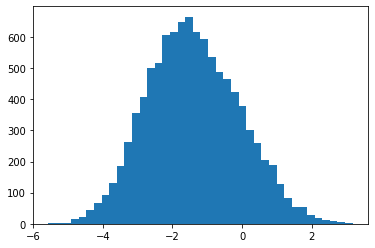

In [50]:
def bayesian_model_1(size):
    with numpyro.plate('samples', size=size):
        mu = numpyro.sample('mu', numdist.Categorical(jnp.array([0.6, 0.2, 0.2])))
        sigma = numpyro.sample('sigma', numdist.Beta(2, 5))
        x = numpyro.sample('x', numdist.Normal(mu, sigma))
        y = numpyro.sample('y', numdist.TransformedDistribution(numdist.Normal(x, 1), [numdist.transforms.AffineTransform(-2, 1)]))
        return y
    
# with numpyro.handlers.seed(rng_seed=42):
#     samples = bayesian_model_1(10000)
samples = numpyro.handlers.seed(bayesian_model_1, rng_seed=42)(10000)

_ = plt.hist(samples, bins=40)

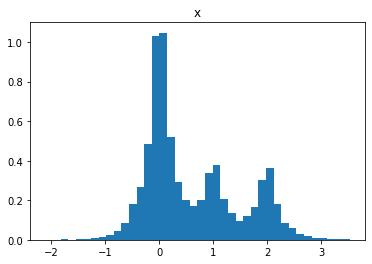

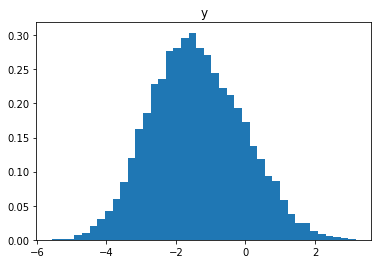

In [49]:
# with numpyro.handlers.seed(rng_seed=42):
#     trace = numpyro.handlers.trace(bayesian_model_1).get_trace(10000)
trace = numpyro.handlers.trace(numpyro.handlers.seed(bayesian_model_1, rng_seed=42)).get_trace(10000)
    
plt.figure()
plt.hist(trace['x']['value'], bins=40, density=True)
plt.title('x')

plt.figure()
plt.hist(trace['y']['value'], bins=40, density=True)
plt.title('y')
_=_

## Transition matrices

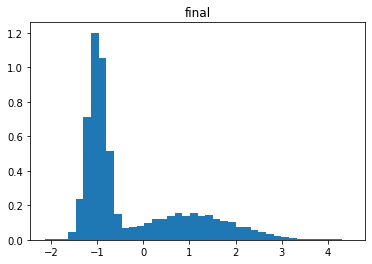

In [51]:
t0 = jnp.array([[0.6, 0.2, 0.2]])
t1 = jnp.array([[0.8, 0.2],
                [0.5, 0.5],
                [0.2, 0.8]])
mu = jnp.array([-1, 1])
sigma = jnp.array([0.2, 1])

def bayesian_model_2(size):
    with numpyro.plate('samples', size=size):
        c0 = numpyro.sample('c0', numdist.Categorical(t0[0]))
        c1 = numpyro.sample('c1', numdist.Categorical(t1[c0]))
        final = numpyro.sample('final', numdist.Normal(mu[c1], sigma[c1]))
    
trace = numpyro.handlers.trace(numpyro.handlers.seed(bayesian_model_2, rng_seed=42)).get_trace(10000)

plt.figure()
plt.hist(trace['final']['value'], bins=40, density=True)
plt.title('final')
_=_
 

# Inference